In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
# 이미지 경로 설정
test_data_dir = 'C:/Users/jihun/4255/OpensourceHW/pkl_result/test_1'

# 이미지 데이터 전처리
test_data_generator = ImageDataGenerator(rescale=1./255)  # 이미지 정규화
test_data = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),  # 이미지 크기 조정
    batch_size=16,
    class_mode='categorical',
    seed=10
)


Found 100 images belonging to 2 classes.


In [5]:
model1 = tf.keras.models.load_model('C:/Users/jihun/4255/OpensourceHW/model/raw_signal_model.h5')
model2 = tf.keras.models.load_model('C:/Users/jihun/4255/OpensourceHW/model/spc_signal_model.h5')

{'normal': 0, 'stress': 1}
[1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0
 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0]
tf.Tensor(0.54, shape=(), dtype=float32)


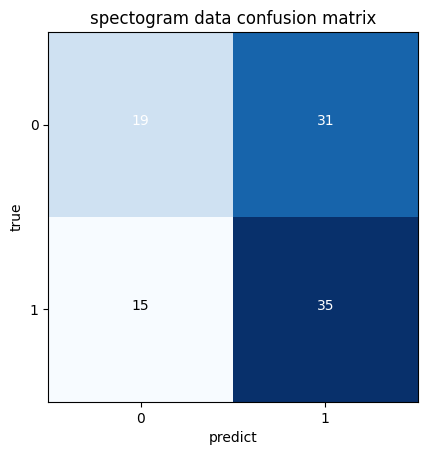

In [6]:
# 테스트 데이터 예측
predictions = model1.predict(test_data)

class_labels= test_data.class_indices
print(class_labels)

y_true = test_data.labels
y_pred = predictions > 0.5

threshold = 0.5
y_pred = np.where(y_pred[:,1] >= threshold, 1,0)
print(y_pred)

metric = tf.keras.metrics.BinaryAccuracy()
accuracy = metric(y_true, y_pred)
print(accuracy)

confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)
confusion_matrix = np.array(confusion_matrix)

plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('spectogram data confusion matrix')
plt.xlabel('predict')
plt.ylabel('true')

# 혼동 행렬의 각 셀에 레이블을 추가합니다.
thresh = confusion_matrix.max() / 2.0
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

# x축과 y축에 0과 1을 표시합니다.
plt.xticks([0, 1])
plt.yticks([0, 1])

plt.show()

{'normal': 0, 'stress': 1}
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
tf.Tensor(0.5, shape=(), dtype=float32)


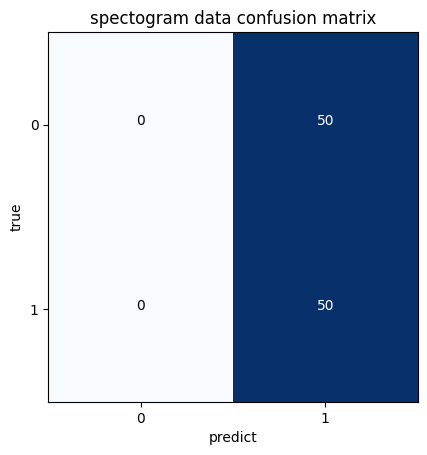

In [7]:
# 테스트 데이터 예측
predictions = model2.predict(test_data)

class_labels= test_data.class_indices
print(class_labels)

y_true = test_data.labels
y_pred = predictions > 0.5

threshold = 0.5
y_pred = np.where(y_pred[:,1] >= threshold, 1,0)
print(y_pred)

metric = tf.keras.metrics.BinaryAccuracy()
accuracy = metric(y_true, y_pred)
print(accuracy)

confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)
confusion_matrix = np.array(confusion_matrix)

plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('spectogram data confusion matrix')
plt.xlabel('predict')
plt.ylabel('true')

# 혼동 행렬의 각 셀에 레이블을 추가합니다.
thresh = confusion_matrix.max() / 2.0
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

# x축과 y축에 0과 1을 표시합니다.
plt.xticks([0, 1])
plt.yticks([0, 1])

plt.show()